In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
tips = sns.load_dataset("tips")

tips_agg = tips.copy() \
.groupby(["time", "size"])\
.size() \
.groupby("time")\
.apply(lambda x: x/x.sum())\
.reset_index(name = 'pct')\

tips_agg.head()



,time,size,pct
0,Lunch,1,0.029412
1,Lunch,2,0.764706
2,Lunch,3,0.073529
3,Lunch,4,0.073529
4,Lunch,5,0.014706


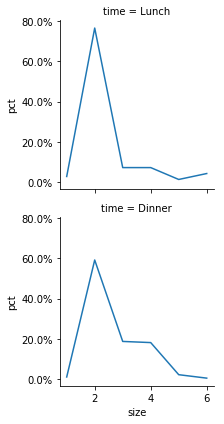

In [34]:
g = sns.FacetGrid(tips_agg, col = "time", col_wrap = 1)
g.map(plt.plot, "size", "pct")

for ax in g.axes.flatten():
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

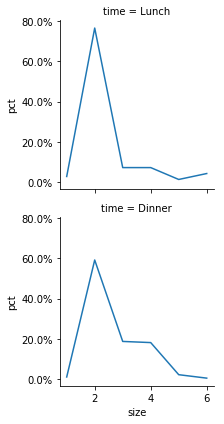

In [35]:
from matplotlib.ticker import FuncFormatter
g = sns.FacetGrid(tips_agg, col = "time", col_wrap = 1)
g.map(plt.plot, "size", "pct")

def to_percent(y, position):
    return '{:,.1%}'.format(y)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

